# 지도학습 회귀 미리보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 농어 무게 예측하기
- K-최근접이웃 회귀모델을 통해 길이값으로 무게 예측

In [2]:
# 데이터 준비(농어)
# - 입력: 길이
# - 라벨(정답): 무게

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

perch_length.shape, perch_weight.shape


((56,), (56,))

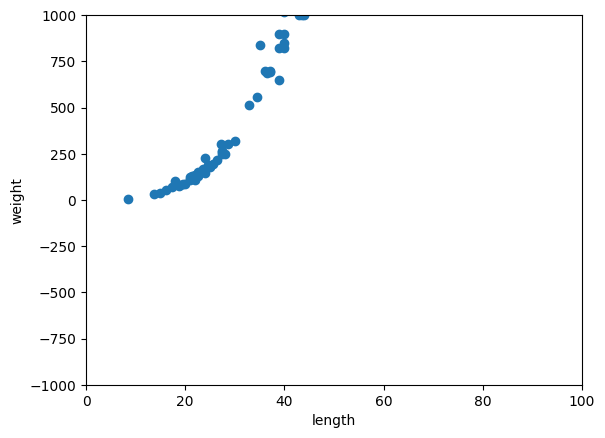

In [3]:
# 데이터 시각화
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim(0, 100)
plt.ylim(-1000, 1000)
plt.show()

In [4]:
# 훈련 / 테스트 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_label, test_label = train_test_split(perch_length, perch_weight, random_state=42)
train_input.shape, test_input.shape, train_label.shape, test_label.shape

((42,), (14,), (42,), (14,))

In [5]:
# 배치차원 추가
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


##### 훈련

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_label)

KNeighborsRegressor()

##### 평가 - 결정계수 $R^2$
$$
    결정계수 = 1 - \frac{(실제값 - 예측)^2의 합}
    {(실제값 - 평균)^2의 합}
$$
- 0 ~ 1 사이의 값을 반환하고, 1에 가까울수록 정확하다는 뜻

In [7]:
# 제곱하는 이유는 값이 음수가 나오면 결과가 달라지는 경우가 많아서 평가지수를 만들 때는 제곱하거나 절대값으로 만드는 경우가 많다
# 실제값과 예측값의 차이가 작을수록 결정계수는 1에 가깝다 -> 정확하다

In [8]:
knr.score(test_input, test_label)

0.992809406101064

##### 예측

In [9]:
pred = knr.predict([[30]])
pred

array([311.4])

In [10]:
distance, index = knr.kneighbors([[30]])
distance, index

(array([[1.3, 2.5, 2.5, 2.8, 3.5]]), array([[28, 13, 18, 20, 21]]))

In [11]:
# 최근접 이웃 5개 무게 값의 평균치 = knr.predict([[예측값]])
train_label[index].mean()  

np.float64(311.4)

##### 최근접이웃모델의 한계
- 메모리에 로드된 데이터포인트만 대상으로 예측하므로 한계점에서 취약
- 용량이 큰 데이터를 메모리에 로드하는 것도 문제

In [12]:
# 로드된 데이터의 범위를 벗어나는 구간에서 한계가 있다.

In [13]:
knr.predict([[50], [100]])  # 길이 50과 100이 같은 예측값을 반환하고 있다.

array([1010., 1010.])

##### 선형회귀 모델

- 속성에 따라 회귀 계수와 절편을 학습하고, 이를 통해 예측

**컬럼이 하나인 경우**

$y = wx + b$

1. 회귀계수 (=기울기, 가중치, weight, coefficient)
2. 절편 (=편향, bias, intercept)

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_label)

LinearRegression()

In [15]:
# 회귀계수, 절편
lr.coef_, lr.intercept_

(array([39.01714496]), np.float64(-709.0186449535474))

In [16]:
# 예측값 직접 계산
w = lr.coef_
b = lr.intercept_
x = np.array([50, 100])

# y = wx + b
w * x  + b

array([1241.83860323, 3192.69585141])

In [17]:
# 모델을 통한 예측
lr.predict([[50], [100]])

array([1241.83860323, 3192.69585141])

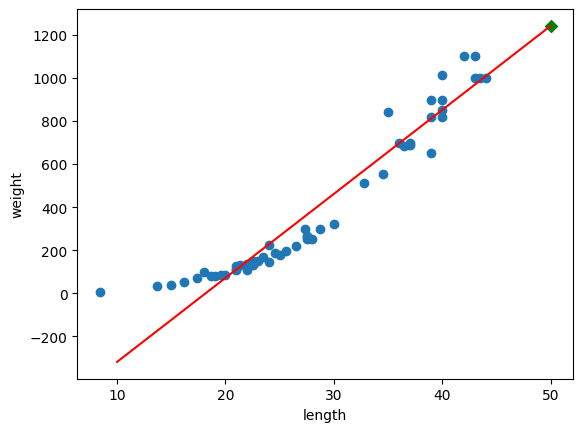

In [18]:
# 시각화
plt.scatter(perch_length, perch_weight)
plt.scatter(50, w * 50 + b, color='green', marker='D')
plt.plot([10, 50], [w * 10 + b, w * 50 + b], color='red')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
lr.score(test_input, test_label)

0.824750312331356

**컬럼이 여러 개인 경우**

$ y = w_1x_1 + w_2x_2 + w_3x_3 + ... + b $

1. 회귀 계수 여러 개
2. 절편 한 개

In [20]:
perch_df = pd.read_csv('./data/perch_full.csv')
perch_df.info()
perch_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [21]:
# 입력 데이터
perch_full = perch_df.to_numpy()
perch_full.shape

(56, 3)

In [22]:
# 라벨 데이터
perch_weight.shape

(56,)

In [23]:
# 훈련 / 테스트 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(perch_full, perch_weight, random_state=42)
train_input.shape, test_input.shape, train_label.shape, test_label.shape

((42, 3), (14, 3), (42,), (14,))

In [24]:
# 훈련
lr = LinearRegression()
lr.fit(train_input, train_label)

LinearRegression()

In [25]:
# 가중치, 절편 -> 직접 계산
w1, w2, w3 = lr.coef_
b = lr.intercept_

x1, x2, x3 = 20.0, 5.08, 2.77

w1 * x1 + w2 * x2 + w3 * x3 + b

np.float64(40.484698833552216)

In [26]:
# 예측
lr.predict([[20.0, 5.08, 2.77]])

array([40.48469883])

In [27]:
# 평가
lr.score(test_input, test_label), lr.score(train_input, train_label)    # train_input 데이터들도 선형 위에 있지 않기 때문에 
                                                                        # train_input으로도 100점이 나올수 없다
                                                                        # data의 모든 특성을 포함할 수 없다                                                                        

(0.8796419177546367, 0.9559326821885706)

### 특성 공학 (Feature Engineering)
- 기계학습 성능 향상을 위해 기존 데이터에서 새로운 특성을 만들거나 기존 특성을 변환하는 전처리
    - 특성 생성
    - 특성 변환
    - 결측치 처리
    - 차원 축소
    - 범주형 데이터 처리 (인코딩)

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit([[4, 5]])  # 속성이 2개인 feature
poly.transform([[4, 5]])    # 속성을 fit에 맞춰서 transform -> 속성을 늘려준다

array([[ 4.,  5., 16., 20., 25.]])

In [29]:
poly.get_feature_names_out()    # array([[ 4.,  5., 16., 20., 25.]]) 와 대응되는 5개의 값

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False, degree=3) # degree 기본값 : 2
poly.fit([[4, 5]])  # 속성 2개인 feature
poly.transform([[4, 5]])    # degree에 3을 줬으므로 속성을 3차까지 늘려준다

array([[  4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [31]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3'], dtype=object)

In [47]:
# 농어 데이터 특성 추가
poly = PolynomialFeatures(include_bias=False, degree=2)
poly.fit(perch_full)
poly_perch = poly.transform(perch_full)
poly_perch

array([[8.400000e+00, 2.110000e+00, 1.410000e+00, 7.056000e+01,
        1.772400e+01, 1.184400e+01, 4.452100e+00, 2.975100e+00,
        1.988100e+00],
       [1.370000e+01, 3.530000e+00, 2.000000e+00, 1.876900e+02,
        4.836100e+01, 2.740000e+01, 1.246090e+01, 7.060000e+00,
        4.000000e+00],
       [1.500000e+01, 3.820000e+00, 2.430000e+00, 2.250000e+02,
        5.730000e+01, 3.645000e+01, 1.459240e+01, 9.282600e+00,
        5.904900e+00],
       [1.620000e+01, 4.590000e+00, 2.630000e+00, 2.624400e+02,
        7.435800e+01, 4.260600e+01, 2.106810e+01, 1.207170e+01,
        6.916900e+00],
       [1.740000e+01, 4.590000e+00, 2.940000e+00, 3.027600e+02,
        7.986600e+01, 5.115600e+01, 2.106810e+01, 1.349460e+01,
        8.643600e+00],
       [1.800000e+01, 5.220000e+00, 3.320000e+00, 3.240000e+02,
        9.396000e+01, 5.976000e+01, 2.724840e+01, 1.733040e+01,
        1.102240e+01],
       [1.870000e+01, 5.200000e+00, 3.120000e+00, 3.496900e+02,
        9.724000e+01, 5.834400

In [48]:
# 훈련-테스트 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)

In [49]:
# 훈련
lr = LinearRegression()
lr.fit(train_input, train_label)

LinearRegression()

In [50]:
# 평가
lr.score(test_input, test_label), lr.score(train_input, train_label)

(0.9714559911594125, 0.9903183436982126)

##### 특성을 5차까지 늘려보기

In [51]:
# 3차 

poly = PolynomialFeatures(include_bias=False, degree=3)
poly.fit(perch_full)
poly_perch = poly.transform(perch_full)
poly_perch

train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)

lr = LinearRegression()
lr.fit(train_input, train_label)

lr.score(test_input, test_label), lr.score(train_input, train_label)

(0.9410534492198891, 0.9963872340980141)

In [57]:
def test_poly_feature(degree):
    # 특성 추가 
    poly = PolynomialFeatures(include_bias=False, degree=degree)
    poly_perch = poly.fit_transform(perch_full)

    # 훈련-테스트 데이터 분리
    train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)
    
    # 학습 
    lr = LinearRegression()
    lr.fit(train_input, train_label)

    # 평가 
    return lr.score(train_input, train_label), lr.score(test_input, test_label)

In [58]:
for i in range(2, 6):
    print(test_poly_feature(i))

(0.9903183436982126, 0.9714559911594125)
(0.9963872340980141, 0.9410534492198891)
(0.9995286898073679, -6.786696932218207)
(0.9999999999997232, -144.40564483377855)


In [59]:
# 차수가 늘어날수록 훈련 데이터에 대한 평가는 올라가지만 테스트 데이터에 대한 평가는 떨어지고 있다

### 과대적합 & 과소적합

**과대적합 (overfitting)**
- 모델이 훈련 데이터에 지나치게 최적화되어 새로운 데이터에 일반화 되지 않은 상태
- 훈련 데이터에 대한 평가는 좋지만 테스트 데이터에 대한 평가가 떨어지는 상태
- 훈련 데이터의 잡음까지 학습된 상태
- 해결 방법
    - 데이터셋의 복잡도 줄이기
    - 학습할 데이터의 양을 늘리기
    - L1, L2가 적용된 규제 모델 사용하기

**과소적합 (underfitting)**
- 모델 훈련이 덜 된 상태
- 속성을 제대로 분석하지 못한 상태
- 훈련 데이터에 대한 평가조차 좋지 않은 상태
- 해결방법
    - 학습할 데이터를 추가 제공하기
    - 특성을 추가해 복잡한 패턴을 학습시키기